# Profiling skforecast

## Libraries and data

In [3]:
# Libraries
# ==============================================================================
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.ForecasterAutoregCustom import ForecasterAutoregCustom
from skforecast.model_selection import grid_search_forecaster
from skforecast.model_selection import backtesting_forecaster

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

%load_ext pyinstrument

In [4]:
# Data
# ==============================================================================
n = 10_000
data = pd.Series(data = np.random.normal(size=n))

## Profiling forecaster fit

In order to exclude the training process of the regressor, a summy regressor class is created.m

In [7]:
class DummyRegressor(LinearRegression):
    '''
    '''
    
    def fit(self, X, y):
        pass

    def predict(self, y):
        predictions = np.ones(shape = len(y))
        return predictions
        

In [6]:
%%pyinstrument

forecaster = ForecasterAutoreg(
                    regressor = DummyRegressor(),
                    lags      = 24
             )

forecaster.fit(y=data)

_     ._   __/__   _ _  _  _ _/_   Recorded: 10:30:47  Samples:  63
 /_//_/// /_\ / //_// / //_'/ //     Duration: 0.070     CPU time: 0.069
/   _/                      v4.3.0

Program: /home/ximo/anaconda3/envs/skforecast/lib/python3.9/site-packages/ipykernel_launcher.py --ip=127.0.0.1 --stdin=9003 --control=9001 --hb=9000 --Session.signature_scheme="hmac-sha256" --Session.key=b"52f95935-d4ad-404f-8984-134018940ef3" --shell=9002 --transport="tcp" --iopub=9004 --f=/home/ximo/.local/share/jupyter/runtime/kernel-v2-26635jQGAB5USbIOU.json

0.068 <module>  ../../../../../../../tmp/ipykernel_27880/1416878990.py:2
|- 0.066 fit  skforecast/ForecasterAutoreg/ForecasterAutoreg.py:384
|     [52 frames hidden]  skforecast, <built-in>, numpy, <__arr...
|        0.057 _create_lags  skforecast/ForecasterAutoreg/ForecasterAutoreg.py:245
|        |- 0.041 [self]  
|        |- 0.015 arange  <built-in>:0
|- 0.001 __init__  skforecast/ForecasterAutoreg/ForecasterAutoreg.py:152
|     [2 frames hidden]  skforecast
`- 0.001 stop  pyinstrument/profiler.py:136
      [3 frames hidden]  pyinstrument

In [7]:
%%pyinstrument

forecaster = ForecasterAutoreg(
                    regressor = LinearRegression(),
                    lags      = 24
             )

forecaster.fit(y=data)

_     ._   __/__   _ _  _  _ _/_   Recorded: 10:30:48  Samples:  131
 /_//_/// /_\ / //_// / //_'/ //     Duration: 0.202     CPU time: 0.354
/   _/                      v4.3.0

Program: /home/ximo/anaconda3/envs/skforecast/lib/python3.9/site-packages/ipykernel_launcher.py --ip=127.0.0.1 --stdin=9003 --control=9001 --hb=9000 --Session.signature_scheme="hmac-sha256" --Session.key=b"52f95935-d4ad-404f-8984-134018940ef3" --shell=9002 --transport="tcp" --iopub=9004 --f=/home/ximo/.local/share/jupyter/runtime/kernel-v2-26635jQGAB5USbIOU.json

0.202 <module>  ../../../../../../../tmp/ipykernel_27880/1959294967.py:2
`- 0.201 fit  skforecast/ForecasterAutoreg/ForecasterAutoreg.py:384
      [131 frames hidden]  skforecast, <built-in>, numpy, <__arr...
         0.118 _create_lags  skforecast/ForecasterAutoreg/ForecasterAutoreg.py:245
         |- 0.089 [self]

In [8]:
%%pyinstrument

forecaster = ForecasterAutoreg(
                    regressor = RandomForestRegressor(random_state=123),
                    lags      = 24
             )

forecaster.fit(y=data), max

_     ._   __/__   _ _  _  _ _/_   Recorded: 10:30:51  Samples:  463
 /_//_/// /_\ / //_// / //_'/ //     Duration: 28.949    CPU time: 28.919
/   _/                      v4.3.0

Program: /home/ximo/anaconda3/envs/skforecast/lib/python3.9/site-packages/ipykernel_launcher.py --ip=127.0.0.1 --stdin=9003 --control=9001 --hb=9000 --Session.signature_scheme="hmac-sha256" --Session.key=b"52f95935-d4ad-404f-8984-134018940ef3" --shell=9002 --transport="tcp" --iopub=9004 --f=/home/ximo/.local/share/jupyter/runtime/kernel-v2-26635jQGAB5USbIOU.json

28.948 <module>  ../../../../../../../tmp/ipykernel_27880/444917129.py:2
`- 28.948 fit  skforecast/ForecasterAutoreg/ForecasterAutoreg.py:384
      [312 frames hidden]  skforecast, sklearn, joblib, <built-i...
         28.365 DepthFirstTreeBuilder.build  <built-in>:0

## Profiling forecaster predict

In [10]:
forecaster = ForecasterAutoreg(
                    regressor = DummyRegressor(),
                    lags      = 24
             )

forecaster.fit(y=data)

In [11]:
%%pyinstrument

_ = forecaster.predict(steps=1000)

_     ._   __/__   _ _  _  _ _/_   Recorded: 10:33:49  Samples:  48
 /_//_/// /_\ / //_// / //_'/ //     Duration: 0.049     CPU time: 0.054
/   _/                      v4.3.0

Program: /home/ximo/anaconda3/envs/skforecast/lib/python3.9/site-packages/ipykernel_launcher.py --ip=127.0.0.1 --stdin=9003 --control=9001 --hb=9000 --Session.signature_scheme="hmac-sha256" --Session.key=b"52f95935-d4ad-404f-8984-134018940ef3" --shell=9002 --transport="tcp" --iopub=9004 --f=/home/ximo/.local/share/jupyter/runtime/kernel-v2-26635jQGAB5USbIOU.json

0.048 <module>  ../../../../../../../tmp/ipykernel_27880/3639615597.py:2
`- 0.048 predict  skforecast/ForecasterAutoreg/ForecasterAutoreg.py:515
      [30 frames hidden]  skforecast, <__array_function__ inter...
         0.048 _recursive_predict  skforecast/ForecasterAutoreg/ForecasterAutoreg.py:465
         |- 0.012 predict  ../../../../../../../tmp/ipykernel_27880/1896692980.py:8
         |  |- 0.010 ones  numpy/core/numeric.py:149
         |  |     [7 frames hidden]  numpy, <__array_function__ internals>...
         |  `- 0.002 [self]

In [14]:
forecaster = ForecasterAutoreg(
                    regressor = RandomForestRegressor(),
                    lags      = 24
             )

forecaster.fit(y=data)

In [15]:
%%pyinstrument

_ = forecaster.predict(steps=1000)

_     ._   __/__   _ _  _  _ _/_   Recorded: 10:35:21  Samples:  18828
 /_//_/// /_\ / //_// / //_'/ //     Duration: 18.979    CPU time: 18.870
/   _/                      v4.3.0

Program: /home/ximo/anaconda3/envs/skforecast/lib/python3.9/site-packages/ipykernel_launcher.py --ip=127.0.0.1 --stdin=9003 --control=9001 --hb=9000 --Session.signature_scheme="hmac-sha256" --Session.key=b"52f95935-d4ad-404f-8984-134018940ef3" --shell=9002 --transport="tcp" --iopub=9004 --f=/home/ximo/.local/share/jupyter/runtime/kernel-v2-26635jQGAB5USbIOU.json

18.978 <module>  ../../../../../../../tmp/ipykernel_27880/3639615597.py:2
`- 18.978 predict  skforecast/ForecasterAutoreg/ForecasterAutoreg.py:515
      [529 frames hidden]  skforecast, sklearn, joblib, <built-i...

## Profiling create train matrix

In [8]:
series_length = np.geomspace(1000, 1000000, num=3, dtype=int)
n_lags = [5, 10, 50, 100, 200]
results = {}

for lags in n_lags:
    execution_time = []
    forecaster = ForecasterAutoreg(
                    regressor = DummyRegressor(),
                    lags      = lags
                 )

    for n in series_length:
        y = pd.Series(data = np.random.normal(size=n))
        tic = time.perf_counter()
        _ = forecaster.create_train_X_y(y=y)
        toc = time.perf_counter()
        execution_time.append(toc-tic)

    results[lags] = execution_time

results = pd.DataFrame(
            data =  results,
            index = series_length
        )

results

,5,10,50,100,200
1000,0.008005,0.005436,0.004568,0.006217,0.028799
31622,0.110926,0.099726,0.109337,0.130316,0.166396
1000000,3.047056,3.163737,3.819172,5.061146,8.490934


<AxesSubplot:>

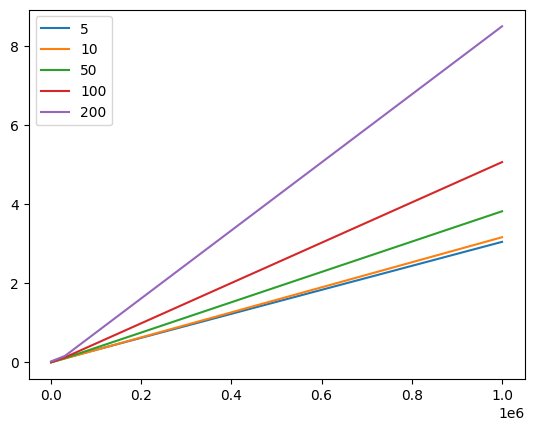

In [9]:
results.plot()